In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Данные All_seasons NBA

Содержат данные на всех игроков NBA за последние два десятилетия.

Основные данные на игрока, такие как: возраст, рост, вес, страна рождения, команда, год драфта, круг драфта.

И игровая статистика,такая как: проведенные игры, средннее количество очков, подборы,передачи.


### Подготовка Данных

In [64]:
# При чтении, сразу привела всех незадрафтованных игроков к NaN, чтобы удалить их из данных

nba = pd.read_csv('all_seasons.csv', na_values = 'Undrafted')

In [65]:
print(nba.shape)

(11700, 22)


In [ ]:
# Убрала всех, кто не играл 

nba = nba[nba.draft_year.notnull()]

In [85]:
# Убрала все повторяющиеся имена игроков

nba = nba.drop_duplicates(['player_name'], keep = 'first' , inplace = False)
print(nba.shape)

(2333, 22)


In [90]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 11676
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1661 non-null   int64  
 1   player_name        1661 non-null   object 
 2   team_abbreviation  1661 non-null   object 
 3   age                1661 non-null   float64
 4   player_height      1661 non-null   float64
 5   player_weight      1661 non-null   float64
 6   college            1661 non-null   object 
 7   country            1661 non-null   object 
 8   draft_year         1661 non-null   float64
 9   draft_round        1643 non-null   float64
 10  draft_number       1643 non-null   float64
 11  gp                 1661 non-null   int64  
 12  pts                1661 non-null   float64
 13  reb                1661 non-null   float64
 14  ast                1661 non-null   float64
 15  net_rating         1661 non-null   float64
 16  oreb_pct           1661

### 1. Распределение игроков по университетам
(Взяла только колледжи с наибольшим количеством игроков > 20)

**Вывод**: Эти данные дают представление об университетах, с наилучшей подготовкой игроков (откуда максимально приходят в NBA) 

Самый больший процент None: иностранные игроки и игроки, после школы



In [93]:
college = nba[['player_name', 'college']].groupby('college').count()

In [101]:
college_20 = college[college['player_name'] > 20 ]

<AxesSubplot:title={'center':'Распределение по Университетам'}, xlabel='college', ylabel='player_name'>

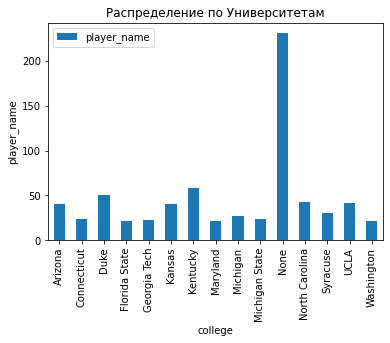

In [104]:
college_20.plot(kind='bar', title='Распределение по Университетам',
                             xlabel='college',
                             ylabel='player_name')

### 2. Возраст игроков

**Вывод**: Эти данные дают представление о распределении игроков по возрасту, дальше можно будет изучать изменение показателей игрока в связи с возрастом. Можно будет построить модель с предсказанием такого изменения. 


In [105]:
age = nba[['player_name', 'age']].groupby('age').count()

<AxesSubplot:title={'center':'Возраст'}, xlabel='age', ylabel='player_name'>

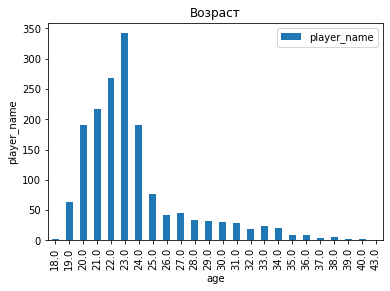

In [106]:
age.plot(kind='bar', title='Возраст',
                             xlabel='age',
                             ylabel='player_name')

### 3. Взаимосвязь Рост - Вес

**Вывод**: Видим сильную корреляцию чем > рост, тем > вес

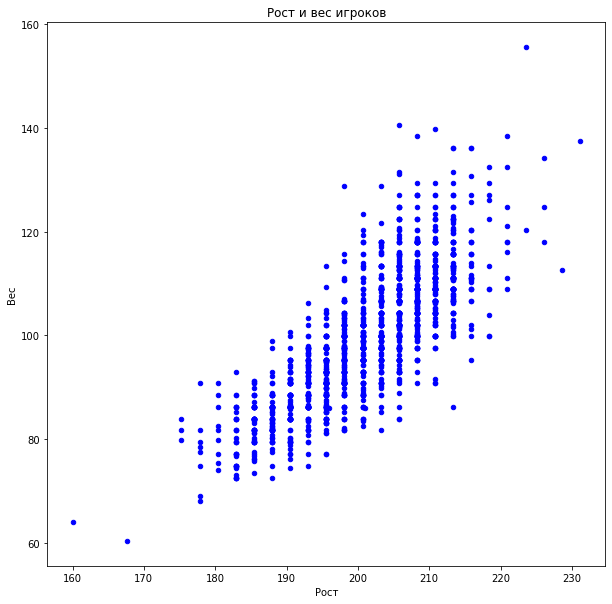

In [114]:
plt.figure(figsize=(10,10))
ax = plt.axes()

ax.scatter(nba.player_height, nba.player_weight,s=20,c='b')

ax.set(xlabel='Рост',
       ylabel='Вес',
       title='Рост и вес игроков');

### 4.Рост игроков

**Вывод**: Эти данные показыывают распределение игроков по росту, дальше можем предсказывать нехватку игроков конкретного роста

In [125]:
height = nba[['player_name', 'player_height']].groupby('player_height').count()

<AxesSubplot:title={'center':'Распределение игроков по росту'}, xlabel='player_height', ylabel='player_name'>

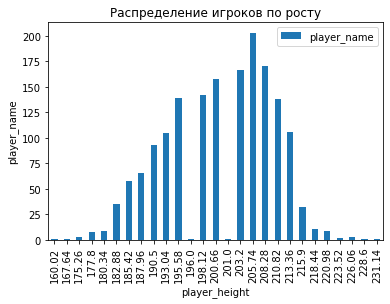

In [129]:
height.plot(kind='bar', title='Распределение игроков по росту',
                             xlabel='player_height',
                             ylabel='player_name')